In [2]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
from scipy import stats
import pylab
%matplotlib inline

In [3]:
df_users = pd.read_csv('/Users/chintan.desai/Documents/Chintan/DataScience/Springboard/Take_Home_Challenge/relax_challenge/takehome_users.csv',encoding = "latin-1")




In [4]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [84]:
df_users['time_stamp_dt'] = pd.to_datetime(df_users['creation_time'])

In [85]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp_dt
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013-03-19 23:14:52
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013-05-21 08:09:28
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013-01-17 10:14:20


In [91]:
from datetime import datetime

#df_users['time_stamp_dt'] = datetime.strptime(df_users['time_stamp_dt'],'%m/%d/%y')

df_users['time_stamp_fmt_dt'] = df_users['time_stamp_dt'].dt.strftime('%m/%d/%Y')
df_users['time_stamp_fmt_dt'] = pd.to_datetime(df_users['time_stamp_fmt_dt'])


In [93]:
df_users['time_stamp_monthyr_dt'] = df_users['time_stamp_dt'].dt.strftime('%m/%Y')
df_users['time_stamp_monthyr_dt'] = pd.to_datetime(df_users['time_stamp_monthyr_dt'])

In [94]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp_dt,time_stamp_fmt_dt,time_stamp_monthyr_dt
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,2014-04-22,2014-04-01
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,2013-11-15,2013-11-01
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013-03-19 23:14:52,2013-03-19,2013-03-01
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013-05-21 08:09:28,2013-05-21,2013-05-01
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013-01-17 10:14:20,2013-01-17,2013-01-01


In [95]:
df_users['time_stamp_monthyr_dt'].unique()

array(['2014-04-01T00:00:00.000000000', '2013-11-01T00:00:00.000000000',
       '2013-03-01T00:00:00.000000000', '2013-05-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2013-12-01T00:00:00.000000000',
       '2012-12-01T00:00:00.000000000', '2013-07-01T00:00:00.000000000',
       '2014-03-01T00:00:00.000000000', '2012-10-01T00:00:00.000000000',
       '2013-02-01T00:00:00.000000000', '2013-08-01T00:00:00.000000000',
       '2014-02-01T00:00:00.000000000', '2012-08-01T00:00:00.000000000',
       '2013-09-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2013-06-01T00:00:00.000000000', '2013-04-01T00:00:00.000000000',
       '2012-09-01T00:00:00.000000000', '2014-05-01T00:00:00.000000000',
       '2012-11-01T00:00:00.000000000', '2012-06-01T00:00:00.000000000',
       '2013-10-01T00:00:00.000000000', '2012-07-01T00:00:00.000000000',
       '2012-05-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [39]:
df_user_engagement = pd.read_csv('/Users/chintan.desai/Documents/Chintan/DataScience/Springboard/Take_Home_Challenge/relax_challenge/takehome_user_engagement.csv',encoding = "latin-1")




In [5]:
df_user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [11]:
df_user_engagement.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [40]:
df_user_engagement['time_stamp_dt'] = pd.to_datetime(df_user_engagement['time_stamp'])

In [41]:
df_user_engagement.index = df_user_engagement['time_stamp_dt']

In [42]:
df_user_engagement['time_stamp_dt'] = df_user_engagement.index.to_period('W-MON').end_time

In [24]:
df_user_engagement['visited'].unique()

array([1])

#### Now We have for each user the time they logged in,their user id and the index contains the Week in which they had logged in with the end-date of the week marked as an index date 

#### Next we will aggregate weekly count by user 

In [36]:
weekly_f_summary = pd.DataFrame()
weekly_f_summary['countlogin'] = df_user_engagement['visited'].resample('W-MON').count()

In [162]:
weekly_f_summary.head(10)

,countlogin
time_stamp_dt,
2012-06-04,41
2012-06-11,66
2012-06-18,106
2012-06-25,105
2012-07-02,127
2012-07-09,126
2012-07-16,157
2012-07-23,165
2012-07-30,196


In [57]:
df_user_eng_weekly_new = pd.DataFrame()
df_user_eng_weekly_new['weekly_count'] = df_user_engagement.groupby(['user_id', pd.Grouper(key='time_stamp_dt', freq='W-MON')])['visited'].sum()

In [60]:
df_user_eng_weekly_new.columns

Index(['weekly_count'], dtype='object')

In [64]:
active_weekly_users = df_user_eng_weekly_new.loc[df_user_eng_weekly_new['weekly_count'] >= 3]

In [112]:
not_that_active_users = df_user_eng_weekly_new.loc[df_user_eng_weekly_new['weekly_count'] < 3]

In [76]:
active_users=set()

for user_id,timestamp in active_weekly_users.index.values:
    active_users.add(user_id)

In [78]:
df_active_users_data = df_users[df_users['object_id'].isin(active_users)]

In [79]:
df_active_users_data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0
19,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN
41,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN
42,43,2012-12-31 07:13:17,Gomes Beatrice,vgqmpljq@yyyxt.com,GUEST_INVITE,1.366010e+09,0,0,63,149.0
52,53,2013-02-09 23:47:15,Ribeiro Camila,CamilaGomesRibeiro@gmail.com,GUEST_INVITE,1.367798e+09,0,0,37,3641.0


In [83]:
df_active_users_data.shape

(1444, 10)

In [96]:
df_active_users_data['creation_source'].unique()

array(['ORG_INVITE', 'SIGNUP', 'GUEST_INVITE', 'SIGNUP_GOOGLE_AUTH',
       'PERSONAL_PROJECTS'], dtype=object)

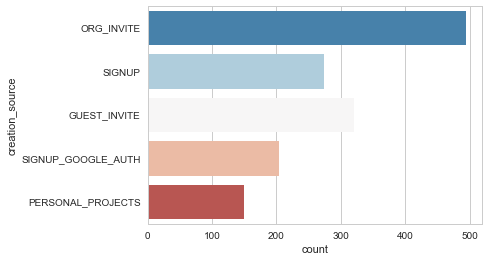

In [97]:
sns.set_style('whitegrid')
sns.countplot(y=df_active_users_data['creation_source'],data=df_active_users_data,palette='RdBu_r')

In [98]:
df_active_users_data['opted_in_to_mailing_list'].unique()

array([1, 0])

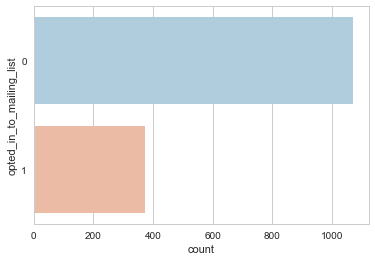

In [99]:
sns.set_style('whitegrid')
sns.countplot(y=df_active_users_data['opted_in_to_mailing_list'],data=df_active_users_data,palette='RdBu_r')

In [111]:

null_invited_by =df_active_users_data.loc[df_active_users_data['invited_by_user_id'].isnull(),:]['invited_by_user_id']
null_invited_by.size

628

In [160]:
ratio = null_invited_by.size/1444
ratio

0.43490304709141275

In [100]:
df_active_users_data['enabled_for_marketing_drip'].unique()

array([1, 0])

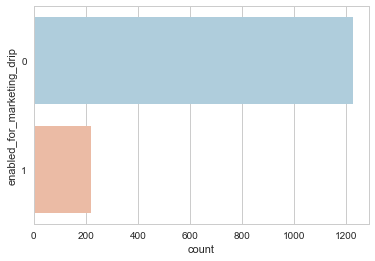

In [101]:
sns.set_style('whitegrid')
sns.countplot(y=df_active_users_data['enabled_for_marketing_drip'],data=df_active_users_data,palette='RdBu_r')

In [151]:
mkt_drip_zero_act = df_active_users_data[df_active_users_data['enabled_for_marketing_drip']==0]['enabled_for_marketing_drip']

In [152]:
mkt_drip_zero_act_cnt =mkt_drip_zero_act.count()

In [153]:
mkt_drip_one_act = df_active_users_data[df_active_users_data['enabled_for_marketing_drip']==1]['enabled_for_marketing_drip']

In [154]:
mkt_drip_one_act_cnt =mkt_drip_one_act.count()

In [157]:
act_zero_ratio = mkt_drip_zero_act_cnt/(mkt_drip_zero_act_cnt+mkt_drip_one_act_cnt)
act_zero_ratio

0.8483379501385041

In [158]:
act_one_ratio = mkt_drip_one_act_cnt/(mkt_drip_zero_act_cnt+mkt_drip_one_act_cnt)
act_one_ratio

0.15166204986149584

#### There are some users who are in 'not active' list and are also part of 'active' list , this happens when for some time perios the user is not that active but later on their activity picks us 

#### so we will drop those users who became active later from 'inactive user' list

In [115]:
mixed_users=set()

for user_id,timestamp in not_that_active_users.index.values:
    mixed_users.add(user_id)

In [116]:
active_users_from_inact = mixed_users.intersection(active_users)

#### lets remove these users from the 'inactive_users' data set

In [167]:

for user_id in active_users_from_inact:
    not_that_active_users.drop(not_that_active_users.index[user_id])

#### Lets Analyze the users who were not active

In [122]:
inactive_users=set()

for user_id,timestamp in not_that_active_users.index.values:
    inactive_users.add(user_id)

In [123]:
df_inactive_users_data = df_users[df_users['object_id'].isin(inactive_users)]

In [124]:
df_inactive_users_data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp_dt,time_stamp_fmt_dt,time_stamp_monthyr_dt
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,2014-04-22,2014-04-01
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,2013-11-15,2013-11-01
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,2013-03-19 23:14:52,2013-03-19,2013-03-01
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,2013-05-21 08:09:28,2013-05-21,2013-05-01
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,2013-01-17 10:14:20,2013-01-17,2013-01-01


In [132]:
df_inactive_users_data.shape

(8819, 13)

In [126]:
df_inactive_users_data['creation_source'].unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

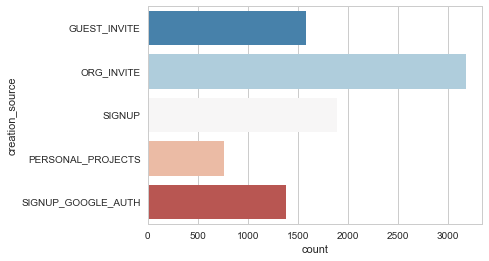

In [127]:
sns.set_style('whitegrid')
sns.countplot(y=df_inactive_users_data['creation_source'],data=df_inactive_users_data,palette='RdBu_r')

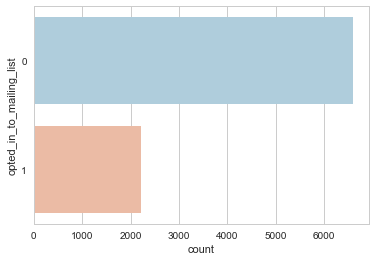

In [128]:
sns.set_style('whitegrid')
sns.countplot(y=df_inactive_users_data['opted_in_to_mailing_list'],data=df_inactive_users_data,palette='RdBu_r')

In [129]:
null_invited_by_inact =df_inactive_users_data.loc[df_inactive_users_data['invited_by_user_id'].isnull(),:]['invited_by_user_id']
null_invited_by_inact.size

4045

In [161]:
ratioin = 4045/8819
ratio

0.43490304709141275

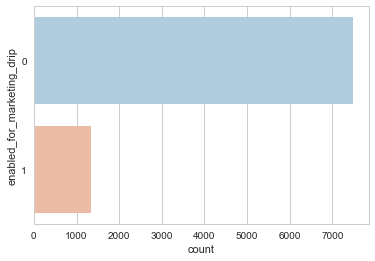

In [130]:
sns.set_style('whitegrid')
sns.countplot(y=df_inactive_users_data['enabled_for_marketing_drip'],data=df_inactive_users_data,palette='RdBu_r')

In [140]:
mkt_drip_zero = df_inactive_users_data[df_inactive_users_data['enabled_for_marketing_drip']==0]['enabled_for_marketing_drip']

In [145]:
cnt_drip_zero = mkt_drip_zero.count()

In [142]:
mkt_drip_one = df_inactive_users_data[df_inactive_users_data['enabled_for_marketing_drip']==1]['enabled_for_marketing_drip']

In [146]:
cnt_drip_one = mkt_drip_one.count()

In [148]:
ration_mktdrip_zero = cnt_drip_zero/(cnt_drip_zero+cnt_drip_one)
ration_mktdrip_one = cnt_drip_one/(cnt_drip_zero+cnt_drip_one)
ration_mktdrip_zero


0.84805533507200359

In [149]:
ration_mktdrip_one

0.15194466492799638

#### We can clearly see that 'enable for marketing drip' as well as 'invited by user id' variables are having the same effect on 'Active' and 'Inactive' users so may be incentivising the users to reward them when they invite others shuold help.

#### As far as creation source we definately see the difference between 'Active' and 'Inactive' users , we can see that 'Guest Invite' is a bigger factor for 'Active' users , so more the 'Guest Invite' the better is the 'Adoption' rate, another factor that we obeserve is the 'Personal Project' as we can see that the proportion of 'Personal Project' is higher among the 'Active' users.

#### Based on these observations we can see that 'Personal Project' and 'Guest Invite' are playing a bigger role in making sure the user is 'actively engaged' on the platform

#### It would be also interesting to capture Campaign Attribution with the Campaign stages so that we can check what Stage of the Campaign the given user is in and how 'Actively engaged' the user is therby checking the Return on Investement on Campaign and may be designing new Campaigns to make sure more users are actively angaged